## Import data from Matlab 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns; sns.set()


data = pd.read_excel('test.xlsx', header = None)
X = data.values
data = data.rename(columns={0: 'x', 1: 'y'})

In [2]:
data.head()

,x,y
0,0.468431,0.914385
1,-0.112123,-0.454892
2,-0.524803,-0.375506
3,0.488670,0.827636
4,0.480743,0.312941


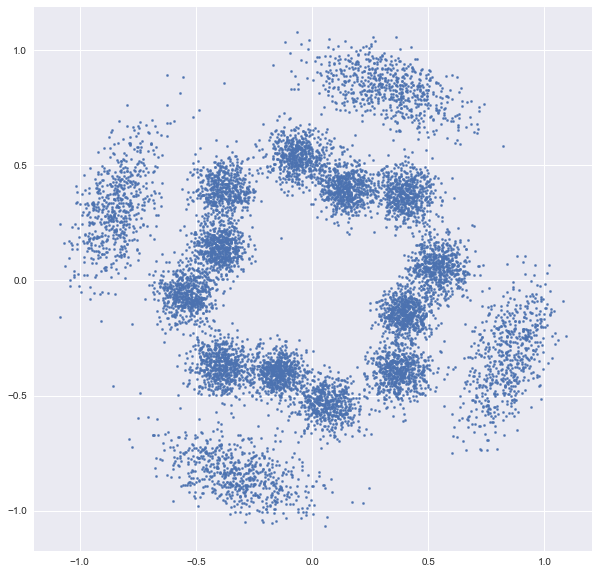

In [3]:
plt.figure(figsize = (10,10))
plt.scatter(data.x,data.y,5)
plt.show()

### Kmeans Method 

In [4]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm

N = 16
model = KMeans(n_clusters= N, random_state = 3)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [5]:
target = pd.DataFrame(model.labels_)
table = pd.concat([data,target], axis = 1).rename(columns = {0:'cluster'})
table.head()

,x,y,cluster
0,0.468431,0.914385,6
1,-0.112123,-0.454892,7
2,-0.524803,-0.375506,11
3,0.488670,0.827636,6
4,0.480743,0.312941,9


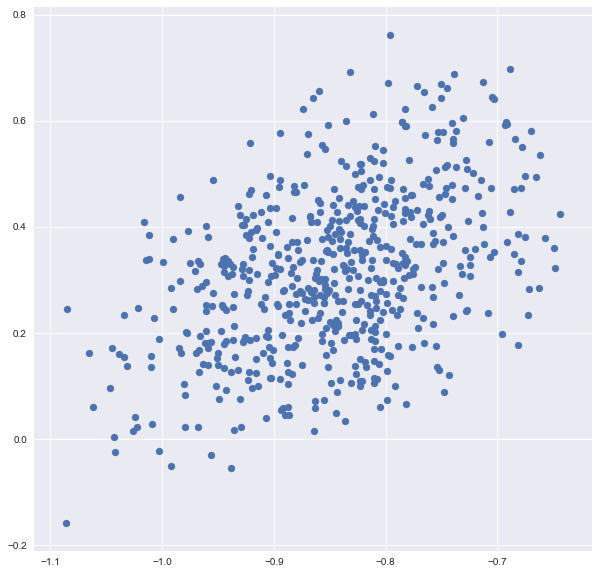

In [6]:
test_data = table[table.cluster == 10]
td = test_data.iloc[:,[0,1]]
plt.figure(figsize = (10,10))
plt.scatter(td.x, td.y)
plt.show()

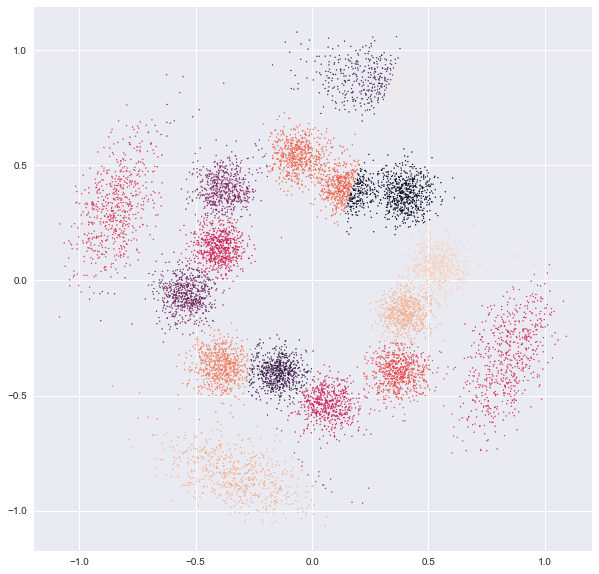

In [7]:
# Create a colormap
colormap = np.random.rand(N)

plt.figure(figsize = (10,10))
plt.scatter(data.x, data.y, 1, c=colormap[model.labels_])
plt.show()

### Gausian Mixture Model 

In [8]:
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange','red', 'purple', 'green',
                              'pink', 'lightblue', 'lightgreen','cyan',
                              'indianred','aqua','firebrick','brown'])

def plot_results(X, Y_, means, covariances, index, title):
    plt.figure(figsize = (10,20))
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 1, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xlim(-9., 5.)
    #plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


<Figure size 720x720 with 0 Axes>

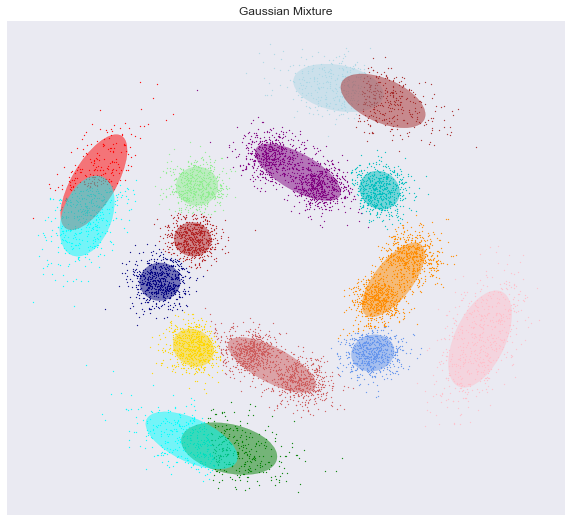

In [9]:
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components= N, covariance_type='full', random_state = 3).fit(X)
labels = gmm.predict(X)
plt.figure(figsize = (10,10))
#plt.scatter(data.x, data.y, c=labels, s=5, cmap='viridis')
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,'Gaussian Mixture')
plt.show()

In [10]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Calculates the Covariance of the ellipse so it the boundry definions
    # are close to the points of interest 
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draws a Boundry over the best fit cluster 
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=5, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

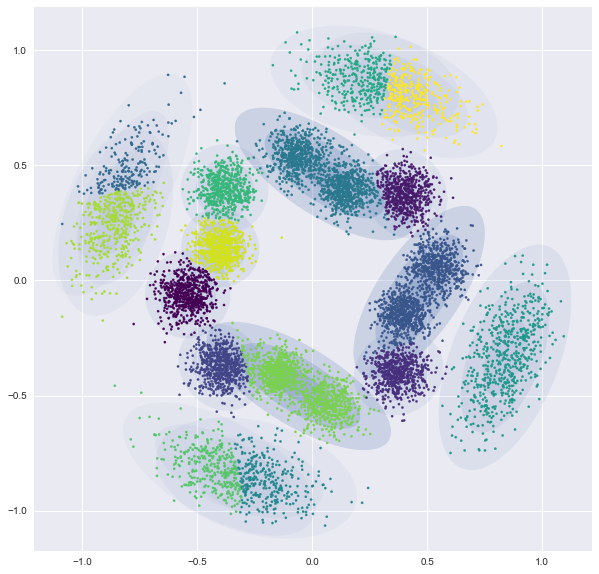

In [11]:
gmm = mixture.GaussianMixture(n_components=16, random_state=3)
plt.figure(figsize = (10,10))
plot_gmm(gmm, X)